# Statistics for ML Mini Project

In [1]:
import numpy as np
import pandas as pd

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Sampling
import random

# For Statistical Calculations
from scipy import stats
from scipy.stats import shapiro, levene
from statsmodels.stats import weightstats as stests
from scipy.stats import chi2,chi2_contingency ,chisquare
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Fifa Dataset

### Basic EDA

In [2]:
# 1)
df1= pd.read_csv('C:/Users/STAYLOSO/Downloads/DSE/Stats for ML/Stats Mini Project/fifa_stats.csv')

df1.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [3]:
df1.shape

(2000, 15)

In [4]:
df1.isnull().sum()/len(df1)*100

# Only 0.95% null values in the Club column.

Name                        0.00
Age                         0.00
Nationality                 0.00
Overall_rating              0.00
Potential                   0.00
Club                        0.95
Preferred Foot              0.00
International Reputation    0.00
Weak Foot                   0.00
Skill Moves                 0.00
Work Rate                   0.00
Position                    0.00
Jersey Number               0.00
Height                      0.00
Weight                      0.00
dtype: float64

In [5]:
df1.dropna(subset=['Club'], inplace=True)

# Removing the rows with null values

In [6]:
df1.describe()

,Age,Overall_rating,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
count,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000
mean,27.215548,78.212014,80.328117,1.777890,3.202928,2.920242,15.253407,5.781886,169.483089
std,3.852519,3.293624,4.118002,0.812861,0.730443,0.964888,13.247428,0.442515,16.053960
min,17.000000,75.000000,75.000000,1.000000,1.000000,1.000000,1.000000,5.083333,123.000000
25%,24.000000,76.000000,77.000000,1.000000,3.000000,2.000000,7.000000,5.500000,159.000000
50%,27.000000,77.000000,80.000000,2.000000,3.000000,3.000000,13.000000,6.000000,170.000000
75%,30.000000,80.000000,83.000000,2.000000,4.000000,4.000000,20.000000,6.166667,181.000000
max,40.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,6.583333,227.000000


## a) Performing Central Limit Theorem

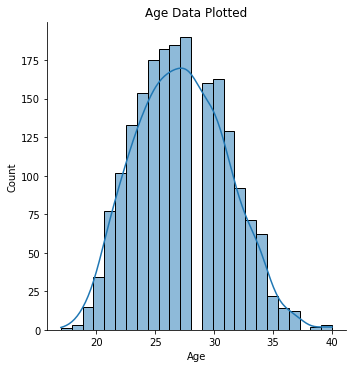

In [7]:
sns.displot(df1['Age'], kde=True)
plt.title("Age Data Plotted")
plt.show()

# Normally Distributed

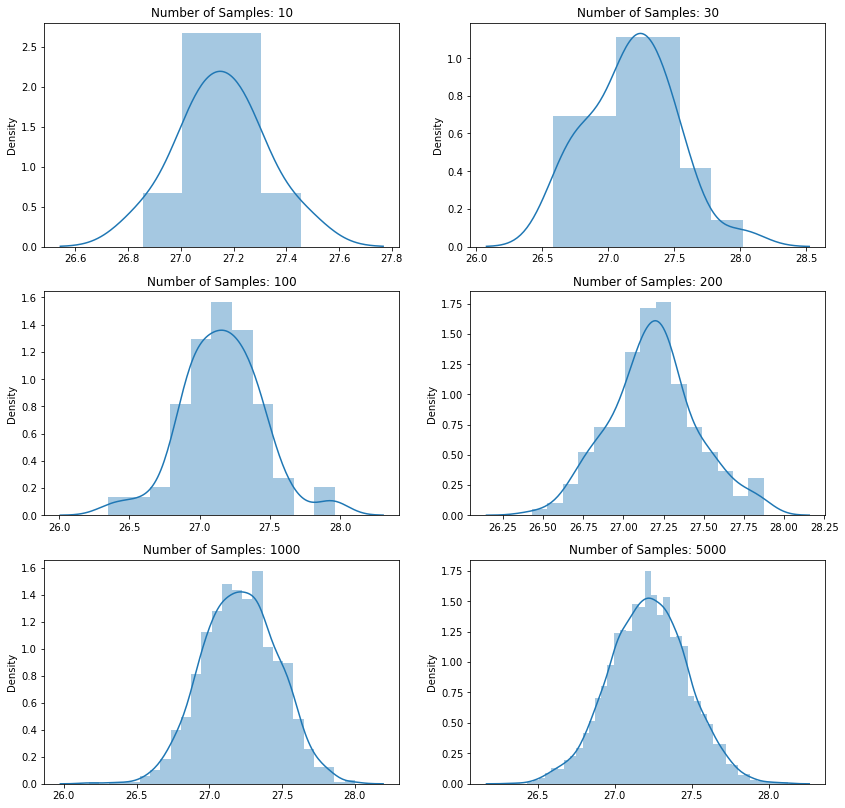

In [8]:
import warnings
warnings.filterwarnings('ignore')

random.seed(17)

plt.figure(figsize=(14,14))

plt.subplot(3,2,1)
sample1= [np.mean(random.sample(list(df1['Age']), k=200)) for i in range(10)]
sns.distplot(sample1)
plt.title("Number of Samples: 10")

plt.subplot(3,2,2)
sample2= [np.mean(random.sample(list(df1['Age']), k=200)) for i in range(30)]
sns.distplot(sample2)
plt.title("Number of Samples: 30")

plt.subplot(3,2,3)
sample3= [np.mean(random.sample(list(df1['Age']), k=200)) for i in range(100)]
sns.distplot(sample3)
plt.title("Number of Samples: 100")

plt.subplot(3,2,4)
sample4= [np.mean(random.sample(list(df1['Age']), k=200)) for i in range(200)]
sns.distplot(sample4)
plt.title("Number of Samples: 200")

plt.subplot(3,2,5)
sample5= [np.mean(random.sample(list(df1['Age']), k=200)) for i in range(1000)]
sns.distplot(sample5)
plt.title("Number of Samples: 1000")

plt.subplot(3,2,6)
sample6= [np.mean(random.sample(list(df1['Age']), k=200)) for i in range(5000)]
sns.distplot(sample6)
plt.title("Number of Samples: 5000")

plt.show()

# We can see that as the number of samples increase, the data becomes more normally distributed.

## Standard Error and The Mean of Sampling Distribution

In [9]:
print("Standard Error:", round(df1['Age'].std()/np.sqrt(len(sample4)), 4))
print("Mean of Sampling Distribution:", round(np.mean(sample4), 3))

Standard Error: 0.2724
Mean of Sampling Distribution: 27.188


## Population Mean and Standard Deviation

In [10]:
print("Population Standard Deviation:", np.std(df1['Age']))
print("Population Mean:", np.mean(df1['Age']))

print("Sampling Error:", abs(np.mean(df1['Age'])-np.mean(sample4)))

# Sampling Error closer to 0 would mean the sample is representative of the population.

# Mean of Sampling Distribution and Population Mean are almost equal. This means that sample is representative of the 
# population.

Population Standard Deviation: 3.8515461098126726
Population Mean: 27.215547703180214
Sampling Error: 0.027572703180211988


In [11]:
# Standard error decreases when sample size increases – as the sample size gets closer to the true size of the population,
# the sample means cluster more and more around the true population mean.

## b) Is there any evidence that the players overall rating is greater than 80?

In [12]:
# H0: Overall_Rating <= 80
# H1: Overall_Rating > 80

In [13]:
z_score, p_val= stests.ztest(x1= df1['Overall_rating'], value= 80)
print('P_Value:', p_val/2)

print("Since P_Value is less than Alpha, Reject the null")
print("Overall Rating of Players is greater than 80")

P_Value: 2.7944738689345338e-129
Since P_Value is less than Alpha, Reject the null
Overall Rating of Players is greater than 80


## c) Statistical Test to identify whether Preferred Foot has any impact on Potential

In [14]:
stat, pvalue= stats.levene(df1[df1['Preferred Foot']=='Right']['Potential'],
            df1[df1['Preferred Foot']=='Left']['Potential'])

print('PValue:', pvalue)
print("Since, PValue is greater than Alpha (0.05), Data has equal variance.")

PValue: 0.2108546965781491
Since, PValue is greater than Alpha (0.05), Data has equal variance.


In [15]:
# H0: There is no correlation between Preferred Foot and Potential
# H1: There is correlation between Preferred Foot and Potential

test_stat , pvalue = stats.f_oneway(df1[df1['Preferred Foot']=='Left']['Potential'],
                                   df1[df1['Preferred Foot']=='Right']['Potential'])
print("PValue:", pvalue)

# Since, PValue is greater than Alpha (0.05), Therefore, We fail to reject the null hypothesis.
# Stating that there is no impact of Preferred Foot on Potential

PValue: 0.10291861885209323


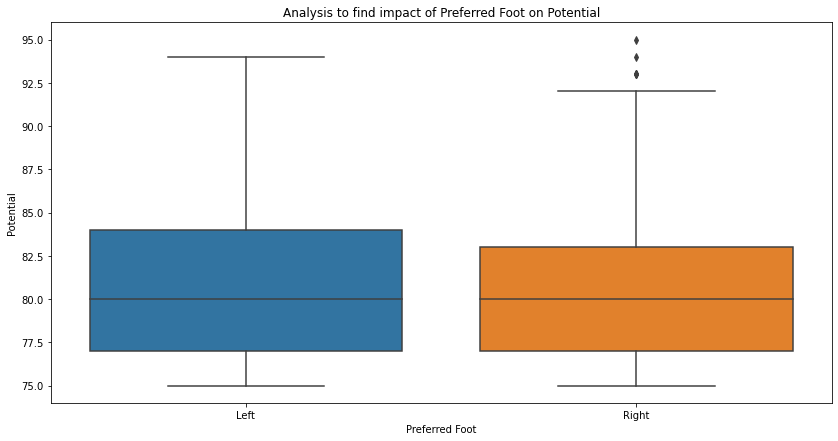

In [16]:
plt.figure(figsize=(14,7))
sns.boxplot(x= df1['Preferred Foot'], y= df1['Potential'])
plt.title("Analysis to find impact of Preferred Foot on Potential")
plt.show()

# No impact of Preferred Foot on Potential because distribution is almost same.

## d) Statistical Test to identify the relation between the Overall Rating and Potential

In [17]:
print("Correlation between Overall Rating and Potential", df1['Overall_rating'].corr(df1['Potential']))

# Positive Relation

Correlation between Overall Rating and Potential 0.7320858358909953


In [18]:
from scipy.stats import spearmanr
# H0: Overall_rating and Potential are uncorrelated
# H1: Overall_rating and Potential are correlated

coef, pvalue = spearmanr(df1['Overall_rating'], df1['Potential'])
print('Spearmans correlation: %.3f' % coef)
alpha = 0.05
if pvalue > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % pvalue)
else:
    print('Samples are correlated (reject H0) p=%.3f' % pvalue)

Spearmans correlation: 0.690
Samples are correlated (reject H0) p=0.000


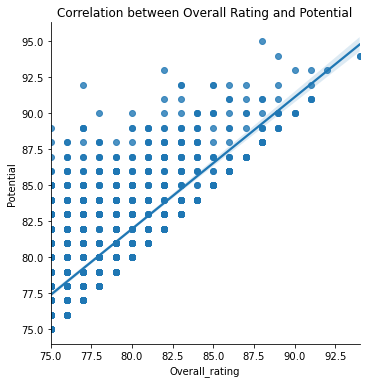

In [19]:
sns.lmplot(data=df1, x='Overall_rating', y='Potential')
plt.title("Correlation between Overall Rating and Potential")
plt.show()

# They have a positive correlation.
# It means as Overall_Rating increases, Potential also increases.

## e) Statistical and Graphical Analysis to see Impact of Skill Moves on Overall_Rating

In [20]:
# H0: There is no correlation between Skill Moves and Overall_rating
# H1: There is correlation between Skill Moves and Overall_rating

test_stat , pvalue = stats.f_oneway(df1[df1['Skill Moves']==1]['Overall_rating'],
                                   df1[df1['Skill Moves']==2]['Overall_rating'],
                                   df1[df1['Skill Moves']==3]['Overall_rating'],
                                   df1[df1['Skill Moves']==4]['Overall_rating'],
                                   df1[df1['Skill Moves']==5]['Overall_rating'])
print("PValue:", pvalue)

# P_Value is less than Alpha (0.05). Therefore, Reject the Null Hypothesis.
# Stating that there is a correlation between Skill Moves and Overall Rating

PValue: 8.630701393554627e-25


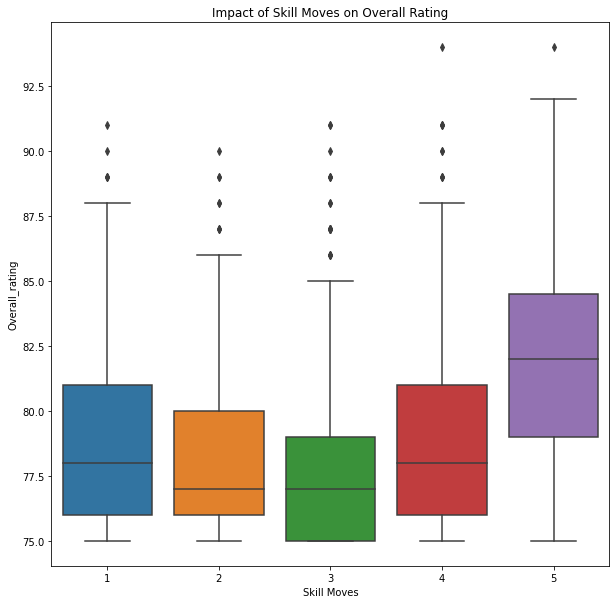

In [21]:
plt.figure(figsize=(10,10))
sns.boxplot(df1['Skill Moves'], df1['Overall_rating'])
plt.title("Impact of Skill Moves on Overall Rating")
plt.show()

# Skill Moves does have an impact on Overall_Rating but it is not that significant.
# As Skill Moves go from 1 to 3, Overall Rating decreases.
# As Skill Moves go from 3 to 5, Overall Rating increases.

## Mobile Network Dataset

### Basic EDA

In [22]:
# 2)
df2= pd.read_csv('C:/Users/STAYLOSO/Downloads/DSE/Stats for ML/Stats Mini Project/phone.csv')

df2.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [23]:
df2.shape

(820, 6)

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          820 non-null    object 
 1   duration      820 non-null    float64
 2   item          820 non-null    object 
 3   month         820 non-null    object 
 4   network       820 non-null    object 
 5   network_type  820 non-null    object 
dtypes: float64(1), object(5)
memory usage: 38.6+ KB


In [25]:
df2.isnull().sum()/len(df2)*100

# No Null Values

date            0.0
duration        0.0
item            0.0
month           0.0
network         0.0
network_type    0.0
dtype: float64

In [26]:
df2.describe()

,duration
count,820.000000
mean,144.304936
std,45.687777
min,0.993514
25%,112.916486
50%,144.179434
75%,175.932308
max,268.458090


## a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the Intervals are wider? Interpret the results.

### Confidence Intervals for each Network separately at 95% and 99% Confidence level

In [27]:
xbar= df2[df2['network']=='Vodafone']['duration'].mean()
sigma= df2[df2['network']=='Vodafone']['duration'].std()
n= len(df2[df2['network']=='Vodafone']['duration'])

In [28]:
interval = stats.norm.interval(0.95, loc= xbar, scale= sigma/np.sqrt(n))
print('At 95% Confidence, Confidence Interval for Vodafone:', interval)

At 95% Confidence, Confidence Interval for Vodafone: (143.33557885755317, 155.8769646383539)


In [29]:
interval = stats.norm.interval(0.99, loc= xbar, scale= sigma/np.sqrt(n))
print('At 99% Confidence, Confidence Interval for Vodafone:', interval)

At 99% Confidence, Confidence Interval for Vodafone: (141.36518434631975, 157.84735914958733)


In [30]:
xbar= df2[df2['network']=='data']['duration'].mean()
sigma= df2[df2['network']=='data']['duration'].std()
n= len(df2[df2['network']=='data']['duration'])

In [31]:
interval = stats.norm.interval(0.95, loc= xbar, scale= sigma/np.sqrt(n))
print('At 95% Confidence, Confidence Interval for data:', interval)

At 95% Confidence, Confidence Interval for data: (134.34059670035657, 147.59668885390988)


In [32]:
interval = stats.norm.interval(0.99, loc= xbar, scale= sigma/np.sqrt(n))
print('At 99% Confidence, Confidence Interval for data:', interval)

At 99% Confidence, Confidence Interval for data: (132.25791367981253, 149.67937187445392)


In [33]:
xbar= df2[df2['network']=='Three']['duration'].mean()
sigma= df2[df2['network']=='Three']['duration'].std()
n= len(df2[df2['network']=='Three']['duration'])

In [34]:
interval = stats.norm.interval(0.95, loc= xbar, scale= sigma/np.sqrt(n))
print('At 95% Confidence, Confidence Interval for Three:', interval)

At 95% Confidence, Confidence Interval for Three: (135.47702762959358, 147.43885448951318)


In [35]:
interval = stats.norm.interval(0.99, loc= xbar, scale= sigma/np.sqrt(n))
print('At 99% Confidence, Confidence Interval for Three:', interval)

At 99% Confidence, Confidence Interval for Three: (133.59768842409747, 149.31819369500928)


In [36]:
xbar= df2[df2['network']=='Meteor']['duration'].mean()
sigma= df2[df2['network']=='Meteor']['duration'].std()
n= len(df2[df2['network']=='Meteor']['duration'])

In [37]:
interval = stats.norm.interval(0.95, loc= xbar, scale= sigma/np.sqrt(n))
print('At 95% Confidence, Confidence Interval for Meteor:', interval)

At 95% Confidence, Confidence Interval for Meteor: (129.90475389256164, 149.60926947953044)


In [38]:
interval = stats.norm.interval(0.99, loc= xbar, scale= sigma/np.sqrt(n))
print('At 99% Confidence, Confidence Interval for Meteor:', interval)

At 99% Confidence, Confidence Interval for Meteor: (126.80895012432784, 152.70507324776426)


In [39]:
xbar= df2[df2['network']=='Tesco']['duration'].mean()
sigma= df2[df2['network']=='Tesco']['duration'].std()
n= len(df2[df2['network']=='Tesco']['duration'])

In [40]:
interval = stats.norm.interval(0.95, loc= xbar, scale= sigma/np.sqrt(n))
print('At 95% Confidence, Confidence Interval for Tesco:', interval)

At 95% Confidence, Confidence Interval for Tesco: (135.1963946873666, 155.37861324620485)


In [41]:
interval = stats.norm.interval(0.99, loc= xbar, scale= sigma/np.sqrt(n))
print('At 99% Confidence, Confidence Interval for Tesco:', interval)

At 99% Confidence, Confidence Interval for Tesco: (132.0255383427889, 158.54946959078254)


In [42]:
# Conclusion: The Confidence Intervals for Individual Networks with confidence level 99% are wider than Confidence Intervals
# with confidence level 95%.

### Confidence Intervals for all the Networks at 95% and 99% Confidence Level

In [43]:
xbar= df2['duration'].mean()
sigma= df2['duration'].std()
n= len(df2['duration'])

In [44]:
interval= stats.norm.interval(0.95, loc= xbar, scale= sigma/np.sqrt(n))
print("At 95% Confidence, Confidence Interval:", interval)

At 95% Confidence, Confidence Interval: (141.1778397288302, 147.4320313908407)


In [45]:
interval= stats.norm.interval(0.99, loc= xbar, scale= sigma/np.sqrt(n))
print("At 99% Confidence, Confidence Interval:", interval)

At 99% Confidence, Confidence Interval: (140.19523500408818, 148.41463611558274)


In [46]:
# Conclusion: Confidence Interval for Duration of Calls with Confidence Level 99% are wider than Confidence Intervals with
# confidence level 95%.

In [47]:
# Interpretation: In both cases Confidence Intervals with 99% Confidence Level are wider than Confidence Intervals with 95%
# Confidence Level.
# It is because, as the Margin of Error decreases, Range of Confidence Interval Increases.

## b) Statistical Analysis to check whether the Networks are equally distributed

In [48]:
df2['network'].value_counts()

Vodafone     215
Three        215
data         150
Meteor        87
Tesco         84
landline      42
voicemail     27
Name: network, dtype: int64

In [49]:
100/7

14.285714285714286

In [50]:
# H0: there is no significant difference in observed and expected value/ obsesrved values and expected values are same
# H1: there is a significant difference in observed and expected value/ obsesrved values and expected values are not same

In [51]:
obs= [215,215,150,87,84,42,27]

prop= [0.14285,0.14285,0.14285,0.14285,0.14285,0.14285,0.14285]

exp_value= [0.14285*820,0.14285*820,0.14285*820,0.14285*820,0.14285*820,0.14285*820,0.14285*820]
exp= np.round(exp_value)

In [52]:
chisquare(obs, exp)

Power_divergenceResult(statistic=307.7863247863248, pvalue=1.7542899243536984e-63)

In [53]:
# P_Value is less than Alpha (0.05). Therefore, Reject the Null Hypothesis.
# Stating that Networks are not equally distributed in the dataset.

## c) Distribution of Duration with respect to each Network

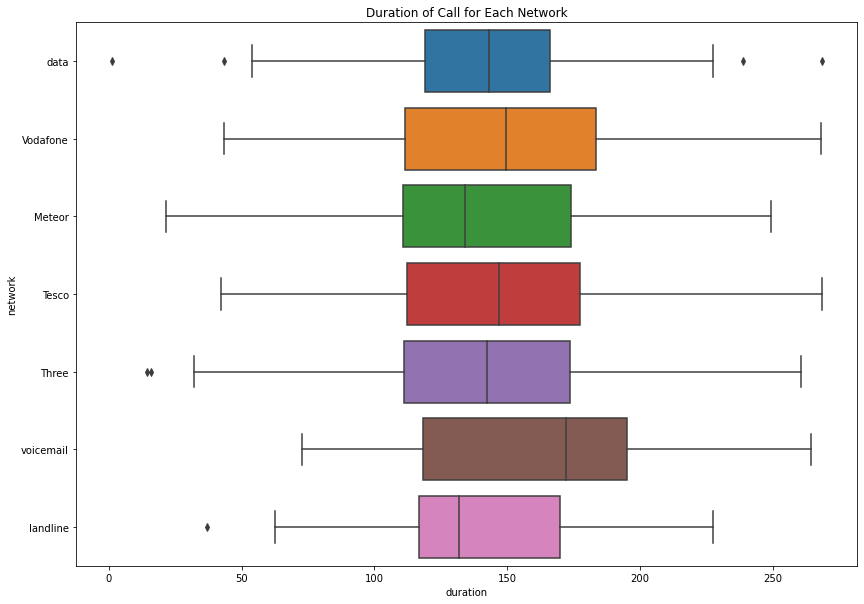

In [54]:
plt.figure(figsize=(14,10))
sns.boxplot(df2['duration'], df2['network'])
plt.title("Duration of Call for Each Network")
plt.show()

# Voicemail has the highest average duration
# Data network has the most outliers
# In every Network 50% data lies between 110 and 200 duration

## d) Statistical Tests to identify the relation between Item and Duration

In [55]:
# H0: There is no relation between item and duration
# H1: There is a relation between item and duration

test_stat, pvalue= stats.f_oneway(df2[df2['item']=='data']['duration'],
                                  df2[df2['item']=='sms']['duration'],
                                  df2[df2['item']=='call']['duration'])
print("P_Value:", pvalue)

# P_Value is greater than Alpha (0.05). Therefore, We fail to reject the Null Hypothesis
# Stating that there is no relation between Item and Duration

P_Value: 0.1456068656611744


In [56]:
tukey = pairwise_tukeyhsd(endog=df2['duration'],
                         groups=df2['item'],
                         alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
  call   data  -6.6347 0.2862 -16.9372  3.6678  False
  call    sms  -6.0621  0.207 -14.4472   2.323  False
  data    sms   0.5726    0.9 -10.2563 11.4015  False
-----------------------------------------------------


## e) Statistical Tests to identify the relation between Network and Network_Type

In [57]:
# H0: No relation between network and network type
# H1: Relation between network and network type

In [58]:
table= pd.crosstab(df2['network'], df2['network_type'])

obs_values= table.values
obs_values

array([[  0,   0,  87,   0],
       [  0,   0,  84,   0],
       [  0,   0, 215,   0],
       [  0,   0, 215,   0],
       [150,   0,   0,   0],
       [  0,  42,   0,   0],
       [  0,   0,   0,  27]], dtype=int64)

In [59]:
tstats, pvalue, df, exp = stats.chi2_contingency(table) # for two categories sample data

print("P_Value:", pvalue)

# P_Value is less than Alpha (0.05). Therefore, reject the Null Hypothesis
# Stating that there is no relation between Network and Network_Type

P_Value: 0.0
